# Understanding variance reduction in Monte Carlo simulation with an example
*Designed by [Antonin Fontaine](https://www.linkedin.com/in/antonin-fontaine/) - Columbia University & ENSAE ParisTech*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---

## I- Description of the problem

<p style='text-align: justify;'>
<b>Monte Carlo simulation</b> refers to a branch of computational methods, the purpose of which is to estimate an unknown vector $\theta \in \mathbb{R}^n$. The main assumption in Monte Carlo simulation is that $\theta$ is related to a known probability distribution $P$, from which it is very easy to generate a random sample $\left(x_1,...,x_k\right)$. More specifically, $\exists h_k: \mathbb{R}^k \to \mathbb{R}$ such that $h_k\left(x_1,...,x_k\right) \simeq \theta$ and $\lim_{k\to\infty}h_k\left(x_1,...,x_k\right)=\theta$.  
</p>

For instance, let assume we want to estimate the following integral:

$$
\theta = \int_0^1 g(x)dx
$$

with $g \in C^0([0,1])$.
<p style='text-align: justify;'>

Let's recall that if $X\sim \mathcal{Unif}(0,1)$, then $\mathbb{E}\left(g(X)\right) = \int_0^1 f(x)g(x)dx$, with $f$ the probability density function of $X$. Since it is well-known that $\forall x\in [0,1]$, $f(x)=1$, it follows:
</p>

$$
\mathbb{E}\left(g(X)\right) = \int_0^1 g(x)dx = \theta
$$

<p style='text-align: justify;'>
Then, recalling the strong law of large numbers, if $X_1,...,X_k$ are i.i.d. $\mathcal{Unif}(0,1)$, we have:
</p>

$$
\lim_{k\to\infty} \frac{1}{k}\sum_{i=1}^k g\left(X_i\right) = \mathbb{E}\left(g(X)\right)= \theta
$$

<p style='text-align: justify;'>
Therefore, we can estimate $\theta$ using Monte Carlo simulations by first generating a random sample $\left(x_1,...,x_k\right)$ according to $\mathcal{Unif}(0,1)$, then applying the function $g$ in order to obtain the vector $\left(g(x_1),...,g(x_k)\right)$, and finally letting $\theta \simeq h_k\left(x_1,...,x_k\right)$, with $h_k:x_1,...,x_k \mapsto \frac{1}{k}\sum_{i=1}^k g\left(x_i\right)$.
</p>

<p style='text-align: justify;'>
According to the strong law of large numbers, the larger the random sample $\left(x_1,...,x_k\right)$, the more accurate the estimate of $\theta$. However, at the same time, the larger the random sample $\left(x_1,...,x_k\right)$, the longer the computation time to output the estimate of $\theta$. Therefore, there exists a trade-off between the computing time of the estimate of $\theta$ using Monte Carlo simulations and the accuracy of the estimate obtained. Some methods enable to reduce the size of the random sample while keeping the same level of accuracy of the estimate of $\theta$.
</p>

<p style='text-align: justify;'>
<b>Variance reduction</b> refers to a set of techniques used to reduce the size of the random sample while keeping the same level of accuracy of the Monte Carlo estimate of $\theta$. In other words, these techniques aim at increasing the convergence time required to obtain an accurate estimate of $\theta$ while keeping the size of the random sample constant. 
</p>

<p style='text-align: justify;'>
Formally, as $h_k\left(x_1,...,x_k\right) \simeq \theta$, the objective is to make $Var\left(h_k\left(x_1,...,x_k\right)\right)$ as small as possible. For instance, recalling the previous example, we have:
</p>

$$
Var\left(h_k\left(x_1,...,x_k\right)\right) = Var\left(\frac{1}{k}\sum_{i=1}^k x_i)\right)=\frac{\sum_{i=1}^k Var\left(x_i\right)}{k^2} = \frac{Var\left(x_1\right)}{k}
$$

<p style='text-align: justify;'>
It is obvious that the variance of the estimate of $\theta$ decreases as $k$, the size of the random sample, increases. Nevertheless, it is possible to reduce $Var\left(h_k\left(x_1,...,x_k\right)\right)$ without increasing $k$, through a smart construction of the random sample $\left(x_1,...,x_k\right)$. The simplest variance reduction technique is based on the following formula for the variance of the sum of two random variables $X_1$ and $X_2$:
</p>

$$
Var\left(X_1 + X_2\right) = Var\left(X_1\right) + Var\left(X_2\right) + 2Cov\left(X_1, X_2\right)
$$

<p style='text-align: justify;'>
If $X_1$ and $X_2$ are chosen such that they are negatively correlated, then $Cov\left(X_1, X_2\right) \leq 0$ and we have:
</p>

$$
Var\left(X_1 + X_2\right) \leq Var\left(X_1\right) + Var\left(X_2\right)
$$ 

<p style='text-align: justify;'>
Thus, a possible approach we will develop throughout this Notebook is to generate $\left\lfloor\frac{k}{2}\right\rfloor$ two-dimentional vectors of negatively correlated random variables $(X_i, X_j)$, also known as <i>antithetic variables</i>. 
</p>

<p style='text-align: justify;'>
The example used to illustrate the concept of variance reduction in Monte Carlo simulation consists in estimating $e = \exp(1)$ using simple order relations on $\mathcal{Unif}(0,1)$ random variables. We will go through the detailed proof of this estimation method as well as the comparative analysis of the variance with and without using the variance reduction technique.
</p>

---

## II- Estimation of $e$ without using variance reduction

<b>Proof:</b>

Let $X$ a random variable defined as follows:

$$
X = \min\{n\geq 2: U_{n} > U_{n-1}\}
$$

with $\forall n \geq 1, U_n \sim \mathcal{Unif}(0,1)$

<p style='text-align: justify;'>
In other words, considering a sequence of $\mathcal{Unif}(0,1)$ random variables $U_1,U_2,...$, $X$ denotes the first random variable $U_n, n\geq 2$ which is greater that the previous random variable $U_{n-1}$. For instance, $X=4$ means that $U_3 \leq U_2 \leq U_1$, but $U_4 > U_3$, i.e. the first $\mathcal{Unif}(0,1)$ random variable which is greater than the previous one is the fourth one. 
</p>

Thus, $\forall k \geq 2$, we have:

$$
\mathbb{P}(X=k) = \mathbb{P}\left(\left(U_{k-1} \leq U_{k-2} \leq ... \leq U_1\right)\cap\left(U_k > U_{k-1}\right)\right)
$$

In order to compute $\mathbb{P}(X=k)$, $\forall k \geq 2$, let first focus on small values of $k$:

* $k=2$

$$
\mathbb{P}(X=2) = \mathbb{P}(U_2 > U_1) = 1 - \mathbb{P}(U_2 \leq U_1)
$$

Since $U_1$ and $U_2$ are identically distributed, by interverting $U_1$ and $U_2$, we have that $\mathbb{P}(U_2 > U_1) = \mathbb{P}(U_2 \leq U_1)$. In follows that:

$$
\mathbb{P}(U_2 > U_1) = 1 - \mathbb{P}(U_2 \leq U_1) \Leftrightarrow \mathbb{P}(U_2 > U_1) = 1 - \mathbb{P}(U_2 > U_1)\Leftrightarrow 2\mathbb{P}(U_2 > U_1) = 1 \Leftrightarrow \mathbb{P}(U_2 > U_1) = \frac{1}{2} \Leftrightarrow \mathbb{P}(X=2) = \frac{1}{2}\\
$$

* $k=3$

$$
\mathbb{P}(X=3) = \mathbb{P}((U_2 \leq U_1)\cap(U_3>U_2)) \Leftrightarrow \mathbb{P}(X=3)= \mathbb{P}((U_2 < U_3 \leq U_1)\cup(U_2 \leq U_1 < U_3))
$$

It follows that:

$$
\mathbb{P}(X=3) = \mathbb{P}(U_2 < U_3 \leq U_1)+ \mathbb{P}(U_2 \leq U_1 < U_3)
$$

<p style='text-align: justify;'>
Since $U_1, U_2$, and $U_3$ are identically distributed, we have that all combinations of $U_1$, $U_2$, and $U_3$ are equally likely to happen. There exists $3! = 6$ combinations of $U_1, U_2$, and $U_3$, namely:
</p>

\begin{align}
U_1 &\leq U_2 \leq U_3\\
U_1 &\leq U_3 \leq U_2\\
U_2 &\leq U_1 \leq U_3\\
U_2 &\leq U_3 \leq U_1\\
U_3 &\leq U_1 \leq U_2\\
U_3 &\leq U_2 \leq U_1\\
\end{align}

It follows that:

$$
\mathbb{P}(X=3) = \mathbb{P}(U_2 < U_3 \leq U_1)+ \mathbb{P}(U_2 \leq U_1 < U_3) = \frac{1}{6} + \frac{1}{6} = \frac{1}{3}
$$ 

* $k=4$

$$
\mathbb{P}(X=4) = \mathbb{P}((U_3 \leq U_2 \leq U_1)\cap(U_4>U_3)) \Leftrightarrow \mathbb{P}(X=4)= \mathbb{P}((U_3 < U_4 \leq U_2 \leq U_1)\cup(U_3 \leq U_2 < U_4 \leq U_1) \cup (U_3 \leq U_2 \leq U_1 < U_4))
$$

It follows that:

$$
\mathbb{P}(X=4) = \mathbb{P}(U_3 < U_4 \leq U_2 \leq U_1)+ \mathbb{P}(U_3 \leq U_2 < U_4 \leq U_1) + \mathbb{P}(U_3 \leq U_2 \leq U_1 < U_4)
$$

<p style='text-align: justify;'>
Since $U_1, U_2, U_3$, and $U_4$ are identically distributed, we have that all combinations of $U_1$, $U_2, U_3$, and $U_4$ are equally likely to happen. There exists $4! = 24$ combinations of $U_1$, $U_2, U_3$, and $U_4$. It follows that:
</p>

$$
\mathbb{P}(X=4) = \mathbb{P}(U_3 < U_4 \leq U_2 \leq U_1)+ \mathbb{P}(U_3 \leq U_2 < U_4 \leq U_1) + \mathbb{P}(U_3 \leq U_2 \leq U_1 < U_4) = \frac{1}{24} + \frac{1}{24} + \frac{1}{24} = \frac{1}{8}
$$ 

Thus, using the same idea, we can easilly compute $\mathbb{P}(X=n), \forall n \geq 2$, as follows:

$$
\mathbb{P}(X=n) = \mathbb{P}((U_{n-1} \leq ... \leq U_2 \leq U_1)\cap(U_n > U_{n-1}))
$$

<p style='text-align: justify;'>
Since $U_1, U_2, ..., U_n$ are identically distributed, we have that all combinations of $U_1, U_2, ..., U_n$ are equally likely to happen. There exists $n!$ combinations of $U_1, U_2, ..., U_n$, each of them having the same probability equal to $\frac{1}{n!}$. 
</p>

<p style='text-align: justify;'>
Moreover, since $U_n$ can be located in $n-1$ different places, the event $\{(U_{n-1} \leq ... \leq U_2 \leq U_1)\cap(U_n > U_{n-1})\}$ is compounded of the union of $n-1$ different events. Indeed, we can have:
</p>

* $U_{n-1} < U_n \leq U_{n-2}$ 
* $U_{n-2} < U_n \leq U_{n-3}$ 
* $...$
* $U_{2} < U_n \leq U_{1}$ 
* $U_{1} < U_n$ 

Hence, $ \forall n \geq 2$, we have:

$$
\mathbb{P}(X=n) = \frac{n-1}{n!}
$$

Then, we have:

$$
\mathbb{E}(X) = \sum_{n=2}^{+\infty} n \mathbb{P}(X=n) = \sum_{n=2}^{+\infty} \frac{n(n-1)}{n!} = \sum_{n=2}^{+\infty} \frac{1}{(n-2)!}= \sum_{n=0}^{+\infty} \frac{1}{n!}
$$

Recalling the Taylor expansion of the exponential, $\forall k \in \mathbb{R}$, we have:

$$
e^k = \sum_{n=0}^{+\infty} \frac{k^n}{n!}
$$

Thus, we have:

$$
\mathbb{E}(X) = \sum_{n=0}^{+\infty} \frac{1^n}{n!} = e
$$

Finally, recalling the strong law of large numbers, we can estimate $\mathbb{E}(X)$ by simulating $n$ values of $X$, denoted by $X_1,X_2,...,X_n$, and letting:

$$
\mathbb{E}(X) = e \simeq \frac{1}{n}\sum_{i=1}^n X_i = \bar{X}
$$ 

<p style='text-align: justify;'>
In order to simulate $X$, it suffices to simulate a sequence of $\mathcal{Unif}(0,1)$ random variables $U_1,U_2,...$ until $U_n > U_{n-1}$, and to output the value $n \geq 2$ corresponding to the number of $\mathcal{Unif}(0,1)$ random variables that has to be simulated.
</p>

<b>Simulation:</b>

In [2]:
def sumulate_exp_method_1(n): # enter the number of simulations

    sequence = list()

    for i in range(n):

        u_prev = np.random.rand()
        count = 1

        while True:
            u_new = np.random.rand()
            count += 1

            if u_new <= u_prev:
                u_prev = u_new

            else:
                sequence.append(count)
                break

    return np.mean(sequence)

<b>Estimate of $e$:</b>

In [3]:
sumulate_exp_method_1(10000)

2.7215

<b>Exact value of $e$:</b>

In [4]:
np.exp(1)

2.718281828459045

---

## III- Estimation of $e$ using variance reduction

<b>Proof:</b>

Recalling the previous method, we have:

$$
Var(X) = \mathbb{E}\left(X^2\right) - \mathbb{E}(X)^2
$$

We already know that $\mathbb{E}(X)^2 = e^2$. Let now compute $\mathbb{E}\left(X^2\right)$, as follows:

$$
\mathbb{E}\left(X^2\right)= \sum_{n=2}^{+\infty} n^2 \mathbb{P}(X=n) = \sum_{n=2}^{+\infty} \frac{n^2 (n-1)}{n!} = \sum_{n=2}^{+\infty} \frac{n}{(n-2)!} = \sum_{n=2}^{+\infty} \frac{n-2}{(n-2)!} + \sum_{n=2}^{+\infty} \frac{2}{(n-2)!} = \sum_{n=3}^{+\infty} \frac{1}{(n-3)!} + 2\sum_{n=2}^{+\infty} \frac{1}{(n-2)!}
$$

On the one hand, we have:

$$
\sum_{n=3}^{+\infty} \frac{1}{(n-3)!} = \sum_{n=0}^{+\infty} \frac{1}{n!} = e
$$

On the other hand, we have:

$$
2\sum_{n=2}^{+\infty} \frac{1}{(n-2)!} = 2\sum_{n=0}^{+\infty} \frac{1}{n!} = 2e
$$

It follows that:

$$
\mathbb{E}\left(X^2\right) = e + 2e = 3e
$$

Finally, we have:

$$
Var(X) = 3e - e^2 \simeq 0.7658
$$

Thus, since $\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i$ is our estimate of $e$, we have:

$$
Var(\bar{X}) = Var\left(\frac{1}{n}\sum_{i=1}^n X_i\right) = \frac{\sum_{i=1}^n  Var\left(X_i\right)}{n^2} = \frac{Var(X)}{n} \simeq \frac{0.7658}{n}
$$



<p style='text-align: justify;'>
We want to find an estimation method of $e$ whose variance is lower than our first estimate $\bar{X}$. Indeed, the variance of an estimator denotes the speed with which the estimator converges to the real value that has to be estimated. In other words, the higher the variance of the estimator, the greater the number of simulations that have to be performed in order to reach the value we seek to estimate.
</p>

Let $X_1, X_2$ be two random variables. Recalling the formula of the variance of the sum of two random variables, we have:

$$
Var\left(\frac{X_1 + X_2}{2}\right) = \frac{1}{4}(Var(X_1) + Var(X_2) + 2Cov(X_1,X_2))
$$

<p style='text-align: justify;'>
It follows that if $X_1$ and $X_2$ are negatively correlated, then $Var\left(\frac{X_1 + X_2}{2}\right)$ will be lower than $Var(X_1) + Var(X_2)$.
</p>

<p style='text-align: justify;'>
Thus, instead of generating independent random variables $X$, a key to reduce $Var(X)$ is to let $X = \frac{X_1 + X_2}{2}$, such that $X_1$ and $X_2$ are negatively correlated. Then, an estimator of $e$ will be given by:
</p>

$$
\mathbb{E}(X) = e \simeq \frac{1}{n}\sum_{i=1}^n \frac{X_1^i + X_2^i}{2}
$$

with $X_1^1,...,X_1^n$ i.i.d. random variables, and $X_2^1,...,X_2^n$ i.i.d. random variables. Then, we would have:

$$
Var\left(\frac{1}{n}\sum_{i=1}^n \frac{X_1^i + X_2^i}{2}\right) = \frac{\sum_{i=1}^n Var\left(\frac{X_1^i + X_2^i}{2}\right)}{n^2} = \frac{Var\left(\frac{X_1 + X_2}{2}\right)}{n}= \frac{\frac{1}{4}(Var(X_1) + Var(X_2) + 2Cov(X_1,X_2))}{n}
$$

Hence, let define $X_1$ and $X_2$ as follows:

* $X_1 = \min\{n\geq 2: U_{n} > U_{n-1}\}$
* $X_2 = \min\{n\geq 2: 1 - U_{n} > 1 - U_{n-1}\} = \min\{n\geq 2: U_{n-1} > U_{n}\}$

Since $U$ and $1-U$ are identically distributed, it follows that $X_1$ and $X_2$ are identically distributed. Thus, we have:

$$
\mathbb{E}\left(\frac{X_1+X_2}{2}\right) = \frac{1}{2}\left(\mathbb{E}(X_1) + \mathbb{E}(X_2)\right) = 2
$$

It follows that $\frac{1}{n}\sum_{i=1}^n \frac{X_1^i + X_2^i}{2}$ is an unbiased estimator of $e$.

<p style='text-align: justify;'>
Moreover, either $X_1$ or $X_2$ must be equal to $2$, while the other must be greater than $2$. Indeed, if $U_{2} > U_{1}$, then $X_1 = \min\{n\geq 2: U_{n} > U_{n-1}\} = 2$, and if $U_{2} < U_{1}$, then $X_2 = \min\{n\geq 2: U_{n-1} > U_{n}\} = 2$. 
</p>

<p style='text-align: justify;'>
Thus, since we know that one of the two random variables $X_1$ or $X_2$ must be at least equal to $3$, let define $N$ the random variables which denotes the number of additional random variables $U_i$, $i \geq 3$, that are required to be generated until $U_n > U_{n-1}$ conditional to $U_2 \leq U_1$. In other words, we have:
</p>

$$
N = \min\left\{n \geq 1: U_{n+2} > U_{n+1} \Bigm| U_2 \leq U_1\right\}
$$

<p style='text-align: justify;'>
Since $U_1, U_2,...$ are identically distributed, $N$ also corresponds to the number of additional random variables $U_i$, $i \geq 3$, that are required to be generated until $U_n < U_{n-1}$ conditional to $U_2 \geq U_1$. In other words, we also have:
</p>

$$
N = \min\left\{n \geq 1: U_{n+2} < U_{n+1} \Bigm| U_2 \geq U_1\right\}
$$

<p style='text-align: justify;'>
It follows that if $X_1=2$, then $X_2 = 2 + N$, and reversely if $X_2 = 2$, then $X_1 = 2 + N$. More precisely, we know that $\mathbb{P}(X_1=2)=\frac{1}{2}$, which implies that $\mathbb{P}(X_1=2+N)=\frac{1}{2}$.
</p>

Thus, we have:

$$
\mathbb{E}\left(X_1\right)= 2 \times \frac{1}{2} + \mathbb{E}(2 + N) \times \frac{1}{2} = 2 + \frac{\mathbb{E}(N)}{2}
$$

Since $\mathbb{E}\left(X_1\right) = e$, we have:

$$
\mathbb{E}\left(X_1\right)=2 + \frac{\mathbb{E}(N)}{2} \Leftrightarrow \frac{\mathbb{E}(N)}{2}  = e - 2 \Leftrightarrow \mathbb{E}(N)  = 2e - 4
$$

Similarly, we have:

$$
\mathbb{E}\left(X_1^2\right)= 4 \times \frac{1}{2} + \mathbb{E}\left((2 + N)^2\right) \times \frac{1}{2} = 2 + \frac{4 + 4\mathbb{E}(N) + \mathbb{E}(N^2)}{2} = 4 + 2\mathbb{E}(N) + \frac{\mathbb{E}(N^2)}{2}
$$

Since $\mathbb{E}\left(X_1^2\right) = 3e$, we have:

$$
\mathbb{E}\left(X_1^2\right)= 4 + 2\mathbb{E}(N) + \frac{\mathbb{E}(N^2)}{2} \Leftrightarrow 3e = 4 + 4e - 8 + \frac{\mathbb{E}(N^2)}{2} \Leftrightarrow \frac{\mathbb{E}(N^2)}{2} = 4 - e \Leftrightarrow \mathbb{E}(N^2) = 8 - 2e
$$

Finally, recalling the fact that either $X_1 = 2$ and $X_2 = 2 + N$, or $X_2 = 2$ and $X_1 = 2 + N$, we have:

$$
Var\left(X_1 + X_2\right) = Var\left(2 + 2 + N\right)= Var\left(4 + N\right)= Var\left(N\right)= \mathbb{E}(N^2)-\mathbb{E}(N)^2 = 8 - 2e - (2e - 4)^2 = -4e^2+14e-8
$$

It follows that:

$$
Var\left(\frac{1}{n}\sum_{i=1}^n \frac{X_1^i + X_2^i}{2}\right) = \frac{\frac{1}{4}Var\left(X_1^i + X_2^i\right)}{n} = \frac{-e^2 + 3.5e - 2}{n}\simeq \frac{0.1249}{n}
$$

whereas recalling the initial method we had:

$$
Var(\bar{X}) \simeq \frac{0.7658}{n}
$$

In order to simulate $X_1$ and $X_2$, it suffices to first simulate $U_1$ and $U_2$ two $\mathcal{Unif}(0,1)$ random variables. 

* If $U_2 < U_1$, then $X_2 = 2$, and we need to simulate $U_3, U_4,...$ until $U_n > U_{n-1}$, and to let $X_1$ equal the value $n \geq 3$ corresponding to the number of $\mathcal{Unif}(0,1)$ random variables that has to be simulated.
* If $U_2 > U_1$, then $X_1 = 2$, and we need to simulate $U_3, U_4,...$ until $U_n < U_{n-1}$, and to let $X_2$ equal the value $n \geq 3$ corresponding to the number of $\mathcal{Unif}(0,1)$ random variables that has to be simulated.

<b>Simulation:</b>

In [5]:
def sumulate_exp_method_2(n):  # enter the number of simulations

    sequence = list()

    for i in range(n):

        x1 = 0
        x2 = 0

        u1 = np.random.rand()
        u2 = np.random.rand()

        count = 0

        if u2 < u1:
            x2 += 2

            while True:
                u_new = np.random.rand()
                count += 1

                if u_new <= u2:
                    u2 = u_new

                else:
                    x1 += 2 + count
                    break

        else:
            x1 += 2

            while True:
                u_new = np.random.rand()
                count += 1

                if u_new >= u2:
                    u2 = u_new

                else:
                    x2 += 2 + count
                    break

        sequence.append(np.mean([x1, x2]))

    return np.mean(sequence)

<b>Estimate of $e$:</b>

In [6]:
sumulate_exp_method_2(10000)

2.7208

<b>Exact value of $e$:</b>

In [7]:
np.exp(1)

2.718281828459045

---

## IV- Comparison of the convergence speed of both simulation methods

Let's finally compare the efficiency of the two methods my comparing their convergence to the real value of $e$ as we increase the number of simulations.

In [8]:
def comparison_methods_sumulate_exp(nb): # enter the maximum number of simulations

    method_1 = [sumulate_exp_method_1(n) for n in range(1, nb)]
    method_2 = [sumulate_exp_method_2(n) for n in range(1, nb)]

    fig, ax = plt.subplots(figsize=(20, 10))
    
    plt.plot(method_1)
    plt.plot(method_2)
    
    plt.title('Comparison of the convergence speed of both simulation methods')
    plt.legend(['Estimate of $e$ without variance reduction', 'Estimate of $e$ with variance reduction'])
    
    ax.set_xlabel('Number of simulations')
    ax.set_ylabel('Estimate of $e$')
    
    return None

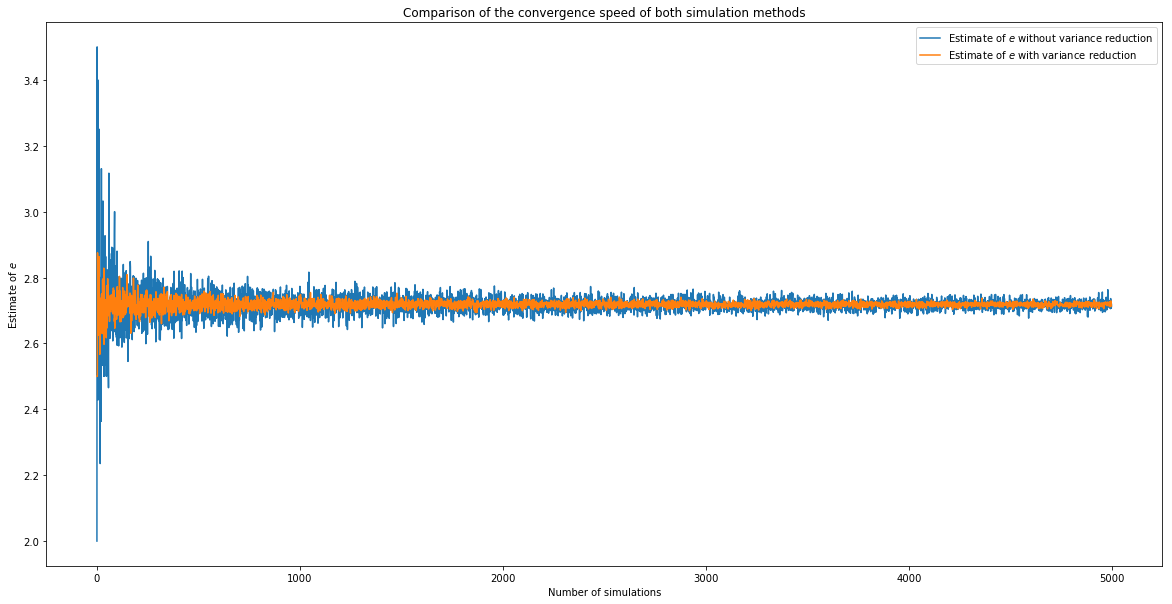

In [9]:
comparison_methods_sumulate_exp(5000) 

---

<p style='text-align: center;'>
<i>Learn through Noteooks</i> © by Antonin Fontaine
</p>
<p style='text-align: justify;'>
<sub><i>Learn through Noteooks</i> is an open-source initiative launched by Antonin Fontaine, based on the idea that Jupyter Noteooks will revolutionize the way STEM-related subjects are taught, ranging from pure theoretical mathematics to pure computer science.</sub>
</p>